<a href="https://colab.research.google.com/github/Angorith/acorn_python_test/blob/main/0630_36%EC%9D%BC%EC%B0%A8_%EB%8B%B9%EB%87%A8%EC%98%88%EC%B8%A1%2C_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9(MEDV)%2C%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC%EA%B5%AC%EC%84%B1%2CCNN(%ED%95%A9%EC%84%B1%EA%B3%B1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = data.iloc[:,:-1]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
Y = data.iloc[:,-1]

In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

시계열 자료는 섞는것보단 따로 지정해서 하는 라이브러리를 사용해야한다. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=156, stratify=Y)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
314,7,109,80,31,0,35.9,1.127,43
73,4,129,86,20,270,35.1,0.231,23
405,2,123,48,32,165,42.1,0.520,26
249,1,111,86,19,0,30.1,0.143,23
241,4,91,70,32,88,33.1,0.446,22
...,...,...,...,...,...,...,...,...
748,3,187,70,22,200,36.4,0.408,36
358,12,88,74,40,54,35.3,0.378,48
646,1,167,74,17,144,23.4,0.447,33
423,2,115,64,22,0,30.8,0.421,21


In [ ]:
Y_train.shape

(614,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, epochs= 1500, batch_size = 64)

Epoch 1/1500
10/10 [==============================] - 1s 3ms/step - loss: 3.1513 - accuracy: 0.3290
Epoch 2/1500
10/10 [==============================] - 0s 4ms/step - loss: 1.9182 - accuracy: 0.4316
Epoch 3/1500
10/10 [==============================] - 0s 4ms/step - loss: 1.4537 - accuracy: 0.5081
Epoch 4/1500
10/10 [==============================] - 0s 4ms/step - loss: 1.3421 - accuracy: 0.5619
Epoch 5/1500
10/10 [==============================] - 0s 5ms/step - loss: 1.2178 - accuracy: 0.5505
Epoch 6/1500
10/10 [==============================] - 0s 3ms/step - loss: 1.1190 - accuracy: 0.5228
Epoch 7/1500
10/10 [==============================] - 0s 3ms/step - loss: 1.0627 - accuracy: 0.5277
Epoch 8/1500
10/10 [==============================] - 0s 2ms/step - loss: 1.0114 - accuracy: 0.5342
Epoch 9/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.9890 - accuracy: 0.5163
Epoch 10/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.9507 - accuracy: 0.5326

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

3/3 [==============================] - 0s 6ms/step - loss: 1.2365 - accuracy: 0.7727
## evaluation loss and_metrics ##
[1.236519455909729, 0.7727272510528564]


In [ ]:
model.predict(X_test.iloc[81,:][np.newaxis,:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


array([[0.10265943]], dtype=float32)

In [ ]:
X_test.iloc[:5, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
81,2,74,0,0,0,0.0,0.102,22
682,0,95,64,39,105,44.6,0.366,22
169,3,111,90,12,78,28.4,0.495,29
693,7,129,68,49,125,38.5,0.439,43
9,8,125,96,0,0,0.0,0.232,54


In [ ]:
X_test.iloc[:5, :].shape

(5, 8)

In [ ]:
y_hat = model.predict(X_test.iloc[:5,:])

In [ ]:
y_hat

array([[0.01975793],
       [0.20002097],
       [0.1167028 ],
       [0.7149101 ],
       [0.14476001]], dtype=float32)

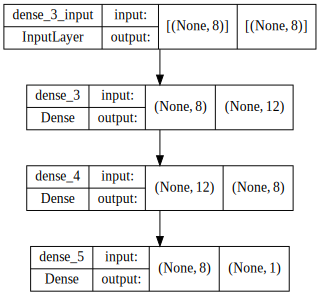

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi = 70).create(prog='dot',format='svg'))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,LSTM, Dropout
import numpy as np

# 1. 데이터셋 생성하기
x_train = signal_data[:576,0:8]
y_train = signal_data[:576,8]
x_test = signal_data[576:,0:8]
y_test = signal_data[576:,8]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
#hist = model.fit(x_train, y_train, epochs=1500, batch_size= 64)
hist = model.fit(x_train, y_train, epochs= 1500, batch_size = 64, validation_data=(x_test, y_test), verbose=2)

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/1500
9/9 - 1s - loss: 0.6882 - accuracy: 0.6562 - val_loss: 0.6884 - val_accuracy: 0.6354 - 1000ms/epoch - 111ms/step
Epoch 2/1500
9/9 - 0s - loss: 0.6837 - accuracy: 0.6580 - val_loss: 0.6843 - val_accuracy: 0.6354 - 45ms/epoch - 5ms/step
Epoch 3/1500
9/9 - 0s - loss: 0.6786 - accuracy: 0.6562 - val_loss: 0.6801 - val_accuracy: 0.6354 - 42ms/epoch - 5ms/step
Epoch 4/1500
9/9 - 0s - loss: 0.6733 - accuracy: 0.6562 - val_loss: 0.6752 - val_accuracy: 0.6354 - 40ms/epoch - 4ms/step
Epoch 5/1500
9/9 - 0s - loss: 0.6676 - accuracy: 0.6562 - val_loss: 0.6716 - val_accuracy: 0.6354 - 38ms/epoch - 4ms/step
Epoch 6/1500
9/9 - 0s - loss: 0.6629 - accuracy: 0.6562 - val_loss: 0.6688 - val_accuracy: 0.6354 - 50ms/epoch - 6ms/step
Epoch 7/1500
9/9 - 0s - loss: 0.6581 - accuracy: 0.6562 - val_loss: 0.6664 - val_accuracy: 0.6354 - 39ms/epoch - 4ms/step
Epoch 8/1500
9/9 - 0s - loss: 0.6547 - accuracy: 0.6562 - val_loss: 0.6645 - val_accuracy: 0.6354 - 50ms/epoch - 6ms/step
Epoch 9/1500
9/9 - 0

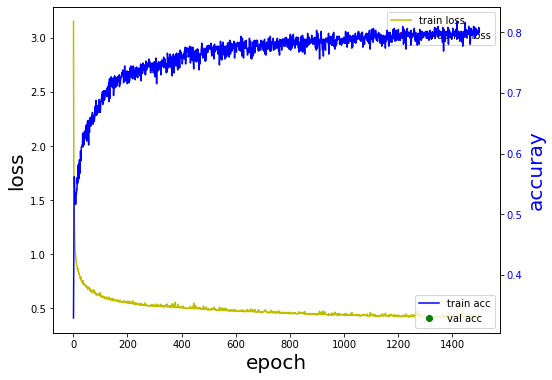

In [ ]:
# 6. 학습과정 살펴보기
from drive.MyDrive import history_plot as hp
hp.history_plot(hist)

사이트를 이용해서 회귀식 

#보스턴 주택가격(MEDV) 예측: 회귀

In [ ]:
BHNames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url, delim_whitespace=True, names= BHNames)

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


출력층 Dense: units= 1, activation='linear'

compile : metrics = ['mae']

activation : 활성화 함수 설정

linear : 디폴트값, 입력 뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.

relu : rectifier 함수, 은닉층에 주로 쓰입니다.

sigmoid: 이진 분류 문제에서 출력층에 주로 쓰입니다.

softmax : 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

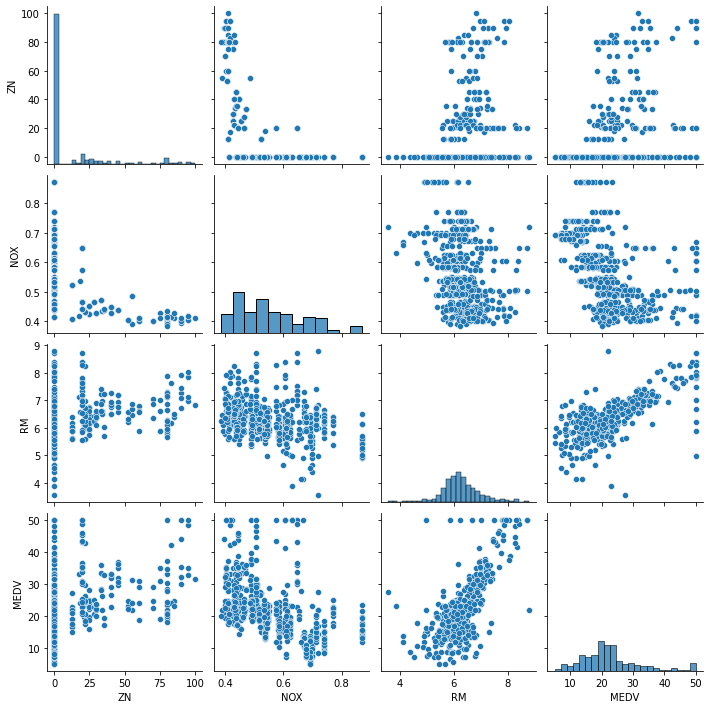

In [ ]:
import seaborn as sns
columns = ["ZN", "NOX", "RM", "MEDV"]

sns.pairplot(data[columns])

plt.show()

In [ ]:
X_train = data.iloc[:,:-1]

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [ ]:
Y_train = data.iloc[:,-1]

In [ ]:
Y_train

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state=156, stratify=Y)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(X_train, Y_train, epochs= 2000, batch_size = 64)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/2000
10/10 [==============================] - 0s 2ms/step - loss: 7592.1230 - mae: 54.8465
Epoch 2/2000
10/10 [==============================] - 0s 2ms/step - loss: 5388.1016 - mae: 45.3244
Epoch 3/2000
10/10 [==============================] - 0s 2ms/step - loss: 3597.2712 - mae: 37.4512
Epoch 4/2000
10/10 [==============================] - 0s 2ms/step - loss: 2330.3047 - mae: 30.8197
Epoch 5/2000
10/10 [==============================] - 0s 2ms/step - loss: 1447.7515 - mae: 24.7761
Epoch 6/2000
10/10 [==============================] - 0s 2ms/step - loss: 816.6078 - mae: 19.3857
Epoch 7/2000
10/10 [==============================] - 0s 2ms/step - loss: 482.1745 - mae: 15.1105
Epoch 8/2000
10/10 [==============================] - 0s 2ms/step - loss: 260.7068 - mae: 11.2390
Epoch 9/2000
10/10 [==============================] - 0s 3ms/step - loss: 130.8885 - mae: 7.9396
Epoch 10/2000
10/10 [==============================] - 0s 3ms/step - loss: 57.1676 - mae: 5.1813
Epoch 11/2000
10/

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
DataScaled = scaler.fit_transform(data)

네트워크 구성


1.   처음 : 소규모로 시작 : node 수를 피처수만큼만 시작하자
2.   반복 : epochs 충분히
3. 모델 돌려보기
4. 모델의 loss, accuracy 과적합이 일어나는지 유무
5. 네트워크 키우기 : 층 추가, nodes 수 추가



scaler.fit() : 훈련 데이터만 사용

scaler.transform(): 훈련데이터, 테스트 데이터

In [ ]:
DataScaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

In [ ]:
DataScaled = pd.DataFrame(DataScaled, columns=BHNames)

In [ ]:
DataScaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [ ]:
DataScaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


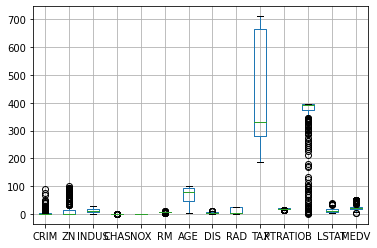

In [ ]:
data.boxplot()

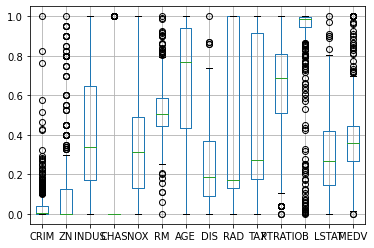

In [ ]:
DataScaled.boxplot()

In [ ]:
X = DataScaled.drop('MEDV', axis=1)
Y = DataScaled['MEDV']

In [ ]:
Y.describe()

count    506.000000
mean       0.389618
std        0.204380
min        0.000000
25%        0.267222
50%        0.360000
75%        0.444444
max        1.000000
Name: MEDV, dtype: float64

In [ ]:
X.shape, Y.shape

((506, 13), (506,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=5)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [ ]:
model = Sequential()
#입력층
model.add(Dense(20, input_dim=13, activation='relu'))
#은닉층
model.add(Dense(10, activation='relu'))
#출력층
model.add(Dense(1, activation='linear'))
#컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

model.fit(X_train, Y_train, epochs= 2000, batch_size = 64)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0665 - mae: 0.2025
Epoch 2/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0551 - mae: 0.1825
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0450 - mae: 0.1646
Epoch 4/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0385 - mae: 0.1503
Epoch 5/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0335 - mae: 0.1393
Epoch 6/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0298 - mae: 0.1308
Epoch 7/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0273 - mae: 0.1235
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0255 - mae: 0.1177
Epoch 9/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0237 - mae: 0.1136
Epoch 10/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0224 - mae: 0.1106
Epoch 11/2000
6/6 [==============================] - 0s 3ms/step - lo

In [ ]:
model = Sequential()
#입력층
model.add(Dense(20, input_dim=13, activation='relu'))
#은닉층
model.add(Dense(10, activation='relu'))
#출력층
model.add(Dense(1, activation='linear'))
#컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs= 2000, batch_size = 64)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1978 - accuracy: 0.0085
Epoch 2/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1529 - accuracy: 0.0028
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.0056
Epoch 4/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1091 - accuracy: 0.0056
Epoch 5/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0926 - accuracy: 0.0056
Epoch 6/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0792 - accuracy: 0.0085
Epoch 7/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.0085
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.0085
Epoch 9/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.0113
Epoch 10/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.0141
Epoch 11/2000
6/6 [

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
score

[0.005721502937376499, 0.05263157933950424]

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
Y_predKM = model.predict(X_test)

In [ ]:
Y_predKM

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LModel = LinearRegression()

In [ ]:
LModel.fit(X_train, Y_train)
Y_predLM = LModel.predict(X_test)

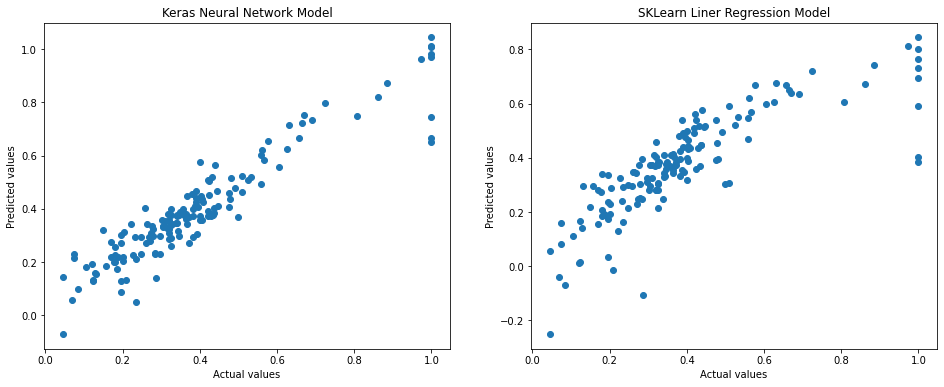

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(Y_test, Y_predKM)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Keras Neural Network Model')

plt.subplot(122)
plt.scatter(Y_test, Y_predLM)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('SKLearn Liner Regression Model')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mae = mean_squared_error(Y_test, Y_predLM)

In [ ]:
print('Linear Regression Model')
print(mae)

Linear Regression Model
0.015159030964982022


In [ ]:
score

[0.005721502937376499, 0.05263157933950424]

In [ ]:
model.metrics_names

['loss', 'accuracy']

loss = Y_test - Y_predKM

MSE = 
$$
{1 \over n}{∑_{i=1}^n  }
$$

# Convolution Neural Network

합성곱은 입력되는 신호에 어떤 값을 곱해 입력된 신호를 번환하는 것을 말한다

이와 같은 일을 하는 이유는 신호의 구분, 변형, 특징 , 추출 같은 작업을 효과적으로 하기 위함이다.

여기서 곱해지는 값들을 필터 혹은 커널이라 한다.

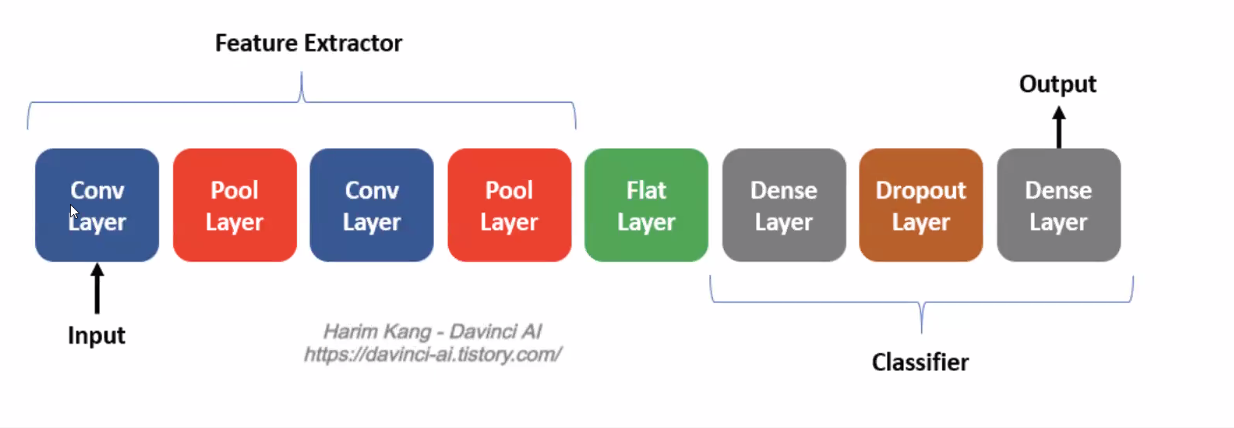

conv Layer = 

예) 1 ,2,3,4 중 4(최대값),11, 22, 30,4 =30


pool Leyer는 대표값 찾는곳

이미지추천 시스템 <- 피처맵



(x1, y1) , (x2, y2)

SQRT((x2-x1)제곱 + (y2 - y1)제곱)

2차원 

(x2- x1) , (y2-y1)

3차원

(x2-x1), (y2-y1), (z2-z1)

n차원

피처맵과 자료1개의 거리는?

2000만개의 자료가 있는 피쳐맵(백화점), 자료1개(T-셔츠)의 거리

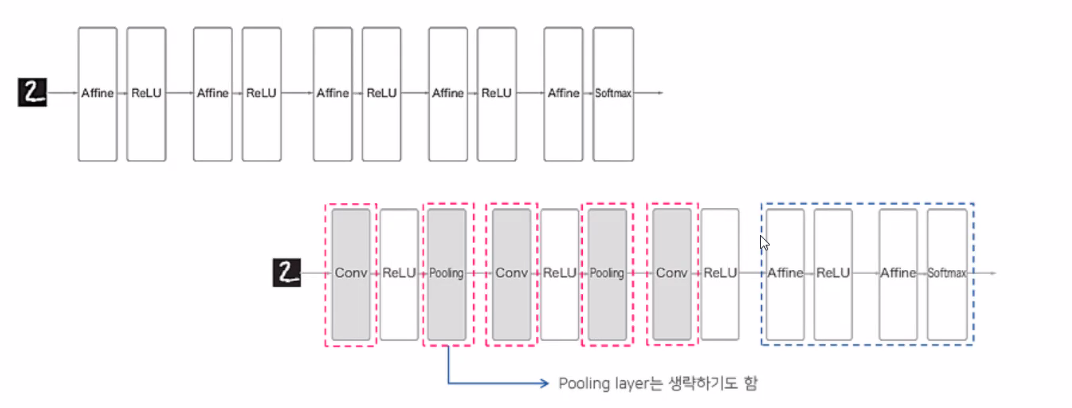

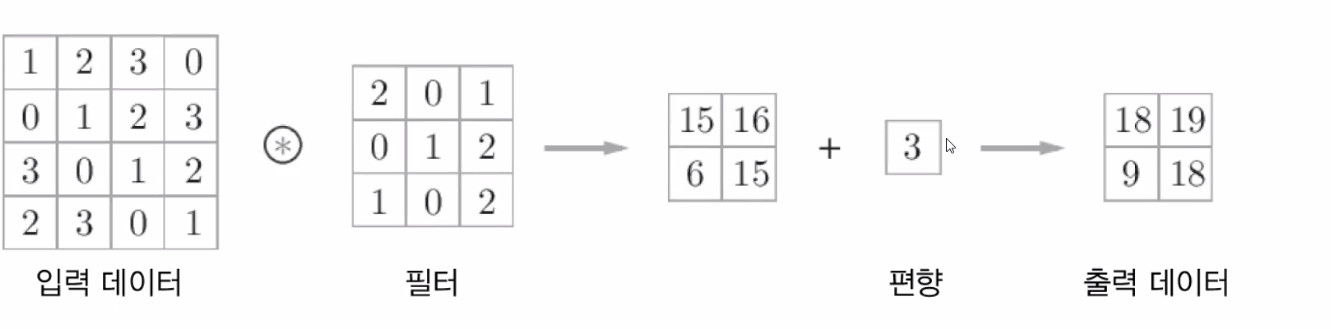

OH = H + 2P -FH/ S +1

OW = W + 2P - FW/ S +1



입력(H,W) (4,4)

패딩 1

스트라이드 1

필터(3,3)

[(4 + 2*1 -3)/1] +1 = 4(OH)

[(4 + 2*1 -3)/1] +1 = 4(OW)